In [255]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [200]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
%config InlineBackend.figure_formats = {'png', 'retina'}

# Some additional functions
def Nint(a):
    if a>=0.0:
        ans=int(a+0.5)
    else:
        ans=int(a-0.5)
    return ans

# Classical: LAMMPS Output

In [201]:
# Number of vertices 
V_class = np.int  (pd.read_csv('NVE-J.atom', header=None).iloc[3][0])

xlo = np.float(pd.read_csv('NVE-J.atom', header=None).iloc[5][0].split()[0])
xhi = np.float(pd.read_csv('NVE-J.atom', header=None).iloc[5][0].split()[1])
ylo = np.float(pd.read_csv('NVE-J.atom', header=None).iloc[6][0].split()[0])
yhi = np.float(pd.read_csv('NVE-J.atom', header=None).iloc[6][0].split()[1])
zlo = np.float(pd.read_csv('NVE-J.atom', header=None).iloc[7][0].split()[0])
zhi = np.float(pd.read_csv('NVE-J.atom', header=None).iloc[7][0].split()[1])

lx_class=xhi-xlo
ly_class=yhi-ylo
lz_class=zhi-zlo
vol_class=lx_class*ly_class*lz_class

pos_class = pd.read_csv('NVE-J.atom', skiprows=9, header=None, delimiter=" ", error_bad_lines=False).iloc[0:].iloc[:V]

x_class=np.array(pos_class[2], dtype=float)*lx_class
y_class=np.array(pos_class[3], dtype=float)*ly_class
z_class=np.array(pos_class[4], dtype=float)*lz_class
    
# Distance calculation
dist_class=np.full((V_class,V_class),0.0)
disp_class=np.full((V_class,V_class,3),0.0)
for m in range(V_class):
    for l in range(V_class):
        dmy_rx=x_class[m]-x_class[l]
        dmy_ry=y_class[m]-y_class[l]
        dmy_rz=z_class[m]-z_class[l]
        
        dmy_rx-=Nint(dmy_rx/lx)*lx_class
        dmy_ry-=Nint(dmy_ry/ly)*ly_class
        dmy_rz-=Nint(dmy_rz/lz)*lz_class
        
        dist_class[m][l]=np.sqrt(dmy_rx**2+dmy_ry**2+dmy_rz**2)
        disp_class[m][l]=np.array([dmy_rx, dmy_ry, dmy_rz])

b'Skipping line 4110: expected 5 fields, saw 6\nSkipping line 4114: expected 5 fields, saw 7\nSkipping line 8215: expected 5 fields, saw 6\nSkipping line 8219: expected 5 fields, saw 7\nSkipping line 12320: expected 5 fields, saw 6\nSkipping line 12324: expected 5 fields, saw 7\nSkipping line 16425: expected 5 fields, saw 6\nSkipping line 16429: expected 5 fields, saw 7\nSkipping line 20530: expected 5 fields, saw 6\nSkipping line 20534: expected 5 fields, saw 7\nSkipping line 24635: expected 5 fields, saw 6\nSkipping line 24639: expected 5 fields, saw 7\nSkipping line 28740: expected 5 fields, saw 6\nSkipping line 28744: expected 5 fields, saw 7\nSkipping line 32845: expected 5 fields, saw 6\nSkipping line 32849: expected 5 fields, saw 7\nSkipping line 36950: expected 5 fields, saw 6\nSkipping line 36954: expected 5 fields, saw 7\nSkipping line 41055: expected 5 fields, saw 6\nSkipping line 41059: expected 5 fields, saw 7\nSkipping line 45160: expected 5 fields, saw 6\nSkipping line 4

b'Skipping line 525445: expected 5 fields, saw 6\nSkipping line 525449: expected 5 fields, saw 7\nSkipping line 529550: expected 5 fields, saw 6\nSkipping line 529554: expected 5 fields, saw 7\nSkipping line 533655: expected 5 fields, saw 6\nSkipping line 533659: expected 5 fields, saw 7\nSkipping line 537760: expected 5 fields, saw 6\nSkipping line 537764: expected 5 fields, saw 7\nSkipping line 541865: expected 5 fields, saw 6\nSkipping line 541869: expected 5 fields, saw 7\nSkipping line 545970: expected 5 fields, saw 6\nSkipping line 545974: expected 5 fields, saw 7\nSkipping line 550075: expected 5 fields, saw 6\nSkipping line 550079: expected 5 fields, saw 7\nSkipping line 554180: expected 5 fields, saw 6\nSkipping line 554184: expected 5 fields, saw 7\nSkipping line 558285: expected 5 fields, saw 6\nSkipping line 558289: expected 5 fields, saw 7\nSkipping line 562390: expected 5 fields, saw 6\nSkipping line 562394: expected 5 fields, saw 7\nSkipping line 566495: expected 5 field

b'Skipping line 919525: expected 5 fields, saw 6\nSkipping line 919529: expected 5 fields, saw 7\nSkipping line 923630: expected 5 fields, saw 6\nSkipping line 923634: expected 5 fields, saw 7\nSkipping line 927735: expected 5 fields, saw 6\nSkipping line 927739: expected 5 fields, saw 7\nSkipping line 931840: expected 5 fields, saw 6\nSkipping line 931844: expected 5 fields, saw 7\nSkipping line 935945: expected 5 fields, saw 6\nSkipping line 935949: expected 5 fields, saw 7\nSkipping line 940050: expected 5 fields, saw 6\nSkipping line 940054: expected 5 fields, saw 7\nSkipping line 944155: expected 5 fields, saw 6\nSkipping line 944159: expected 5 fields, saw 7\nSkipping line 948260: expected 5 fields, saw 6\nSkipping line 948264: expected 5 fields, saw 7\nSkipping line 952365: expected 5 fields, saw 6\nSkipping line 952369: expected 5 fields, saw 7\nSkipping line 956470: expected 5 fields, saw 6\nSkipping line 956474: expected 5 fields, saw 7\nSkipping line 960575: expected 5 field

# AIMD: VASP Output

In [202]:
# Number of vertices 
V_AIMD = np.int(pd.read_csv('ab-initio.txt', header=None).iloc[6][0])

lx_AIMD = np.float(pd.read_csv('ab-initio.txt', header=None).iloc[2][0].split()[0])
ly_AIMD = lx_AIMD
lz_AIMD = lx_AIMD

pos_AIMD = pd.read_csv('ab-initio.txt', skiprows=8, header=None, delimiter=" ").drop(columns=[0,1,3,5])

x_AIMD=np.array(pos_AIMD[2], dtype=float)*lx_AIMD
y_AIMD=np.array(pos_AIMD[4], dtype=float)*ly_AIMD
z_AIMD=np.array(pos_AIMD[6], dtype=float)*lz_AIMD
    
# Distance calculation
dist_AIMD=np.full((V_AIMD,V_AIMD),0.0)
disp_AIMD=np.full((V_AIMD,V_AIMD,3),0.0)
for m in range(V_AIMD):
    for l in range(V_AIMD):
        dmy_rx=x_AIMD[m]-x_AIMD[l]
        dmy_ry=y_AIMD[m]-y_AIMD[l]
        dmy_rz=z_AIMD[m]-z_AIMD[l]
        
        dmy_rx-=Nint(dmy_rx/lx)*lx_AIMD
        dmy_ry-=Nint(dmy_ry/ly)*ly_AIMD
        dmy_rz-=Nint(dmy_rz/lz)*lz_AIMD
        
        dist_AIMD[m][l]=np.sqrt(dmy_rx**2+dmy_ry**2+dmy_rz**2)
        disp_AIMD[m][l]=np.array([dmy_rx, dmy_ry, dmy_rz])

In [239]:
# Adjacency matrix to estimate the bonds and neighbors

# AIMD
bond_dist_AIMD=2.725 
adj_AIMD=dist_AIMD < bond_dist_AIMD
adj_AIMD=adj_AIMD.astype(int)

#Classical
bond_dist_class=2.925
adj_class=dist_class < bond_dist_class
adj_class=adj_class.astype(int)

# Set diagonal to zeros
np.fill_diagonal(adj_AIMD, 0)
np.fill_diagonal(adj_class, 0)


In [240]:
#Function to find the angle between two vectors in 3-D

def Theta(A,B):
    return (np.arccos(np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))))*180/np.pi

#---------------------------------------------------------------------------------------------------------------------

bonds_pack_AIMD=[]
for i in range(V_AIMD):
    neighbors_AIMD=np.where(adj_AIMD[i] == 1)[0]
    bonds_AIMD=[]
    for j in neighbors_AIMD:
        bonds_AIMD.append(disp_AIMD[i,j])
    bonds_pack_AIMD.append(bonds_AIMD)

Theta_pack_AIMD=[]
for k in range(V_AIMD):
    for i in range(len(bonds_pack_AIMD[k])):
        for j in range(len(bonds_pack_AIMD[k])):
            if i!=j:
                Theta_pack_AIMD.append(Theta(bonds_pack_AIMD[k][i], bonds_pack_AIMD[k][j]))
                
Theta_pack_AIMD=np.array(Theta_pack_AIMD)    

#---------------------------------------------------------------------------------------------------------------------

bonds_pack_class=[]
for i in range(V_class):
    neighbors_class=np.where(adj_class[i] == 1)[0]
    bonds_class=[]
    for j in neighbors_class:
        bonds_class.append(disp_class[i,j])
    bonds_pack_class.append(bonds_class)

Theta_pack_class=[]
for k in range(V_class):
    for i in range(len(bonds_pack_class[k])):
        for j in range(len(bonds_pack_class[k])):
            if i!=j:
                Theta_pack_class.append(Theta(bonds_pack_class[k][i], bonds_pack_class[k][j]))
                
Theta_pack_class=np.array(Theta_pack_class)  

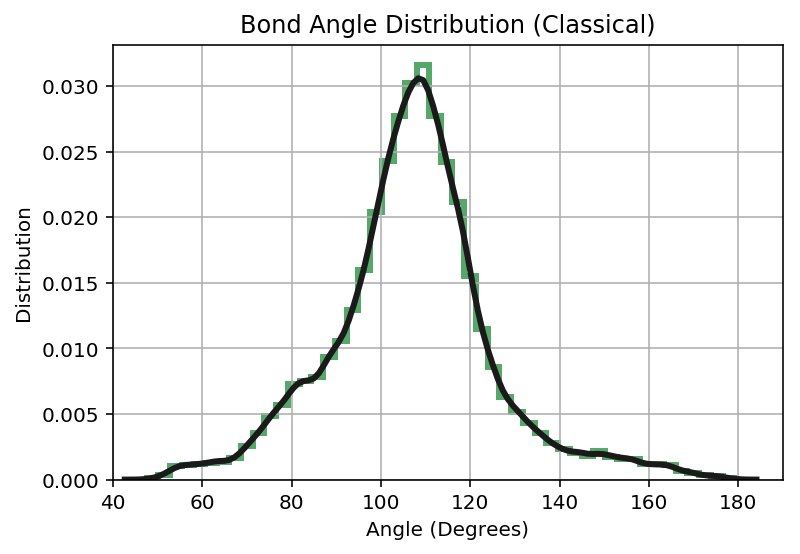

In [253]:
sns.set_color_codes()

sns.distplot(Theta_pack_class,
                  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"}); #, rug=True, rug_kws={"color": "g"}
plt.xlabel('Angle (Degrees)');
plt.xlim(40,190)
plt.ylabel('Distribution');
plt.grid(True)
plt.title('Bond Angle Distribution (Classical)');
plt.savefig('bond_angle_dist_classical.png')

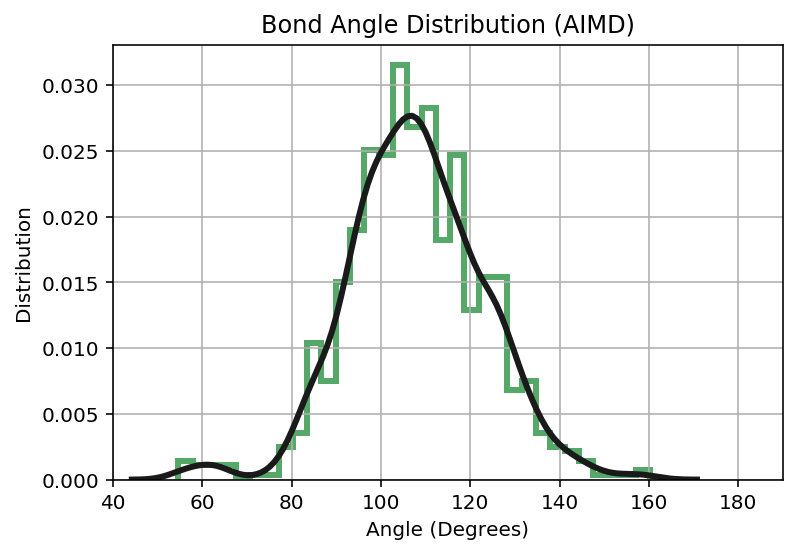

In [254]:
sns.set_color_codes()

sns.distplot(Theta_pack_AIMD,
                  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"}); #, rug=True, rug_kws={"color": "g"}
plt.xlabel('Angle (Degrees)');
plt.xlim(40,190)
plt.ylabel('Distribution');
plt.grid(True)
plt.title('Bond Angle Distribution (AIMD)');
plt.savefig('bond_angle_dist_AIMD.png')

In [256]:
np.savetxt('bond_angles_AIMD.csv', Theta_pack_AIMD, delimiter=',') 

In [257]:
np.savetxt('bond_angles_classical.csv', Theta_pack_class, delimiter=',') 